In [1]:
# Importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the datasets
deliveries_dataset = pd.read_csv("deliveries.csv")
matches_dataset = pd.read_csv("matches.csv")
matches = matches_dataset # Saved a copy of original dataset in case of future need
matches_dataset.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# Dropped the id, date and umpire3 column
matches_dataset = matches_dataset.drop(["id","date","umpire3"],axis=1)

# Shortened the team names to their abbreviations in both the datasets
matches_dataset.replace(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']
                        ,['CSK','DC','DD','DD','GL','KXIP','KTK','KKR','MI','PW','RR','RPS','RPS','RCB','SRH'],inplace=True)
deliveries_dataset.replace(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']
                        ,['CSK','DC','DD','DD','GL','KXIP','KTK','KKR','MI','PW','RR','RPS','RPS','RCB','SRH'],inplace=True)

# Handling the missing data
matches_dataset.city = matches_dataset.city.fillna("Others")
matches_dataset.winner = matches_dataset.winner.fillna("Draw")
matches_dataset.player_of_match = matches_dataset.player_of_match.fillna("Draw")
matches_dataset.umpire1 = matches_dataset.umpire1.fillna("Unknown")
matches_dataset.umpire2 = matches_dataset.umpire2.fillna("Unknown")

matches_dataset.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,2017,Hyderabad,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2017,Pune,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,2017,Rajkot,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,2017,Indore,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,2017,Bangalore,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,Unknown,Unknown


Text(0, 0.5, 'No. of Matches')

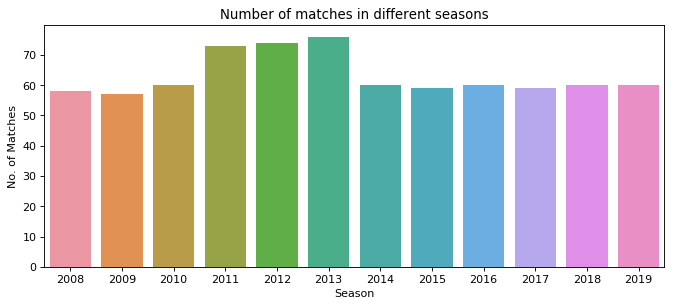

In [4]:
# Number of matches in each season
fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
sns.countplot(x="season",data=matches_dataset)
plt.title("Number of matches in different seasons")
plt.xlabel("Season")
plt.ylabel("No. of Matches")

There were more matches played in the three consecutive years from 2011 to 2013 with maximum number of matches in the year 2013. Except these three years the number of matches played in each year is roughly same.

Text(0, 0.5, 'City')

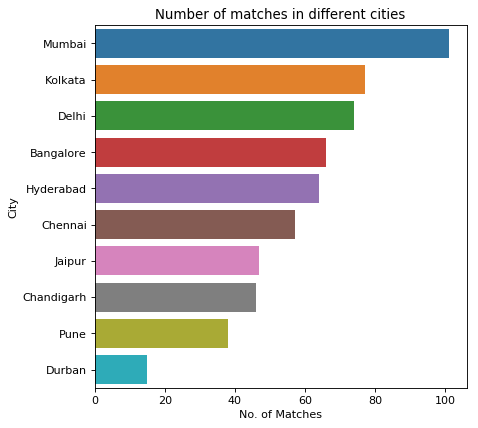

In [5]:
# Number of matches played in each city
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
sns.countplot(y="city",data=matches_dataset,order=matches_dataset.city.value_counts().head(10).index)
plt.title("Number of matches in different cities")
plt.xlabel("No. of Matches")
plt.ylabel("City")

It appears that three out of the four metropolitan cities are hot targets for playing the IPL matches highest from Mumbai down to Delhi followed by Bangalore and Hyderabad on fourth and fifth position.

Text(0, 0.5, 'No. of Tosses')

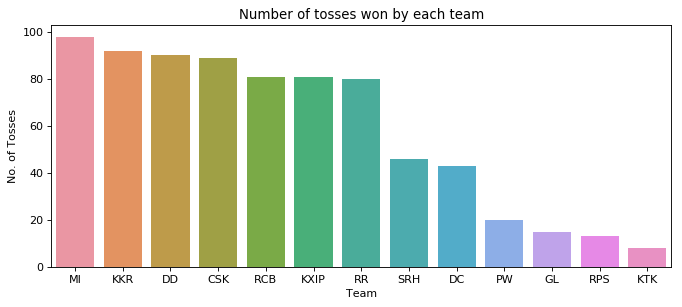

In [6]:
# No. of tosses won by each team
fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
sns.countplot(x="toss_winner",data=matches_dataset,order=matches_dataset.toss_winner.value_counts().index)
plt.title("Number of tosses won by each team")
plt.xlabel("Team")
plt.ylabel("No. of Tosses")

Mumbai Indians claim to win the most number of tosses. The last six teams appear to be winning least number of tosses but this trend can be misleading because they have played very less number of matches compared to other teams.

Text(0, 0.5, 'No. of Matches')

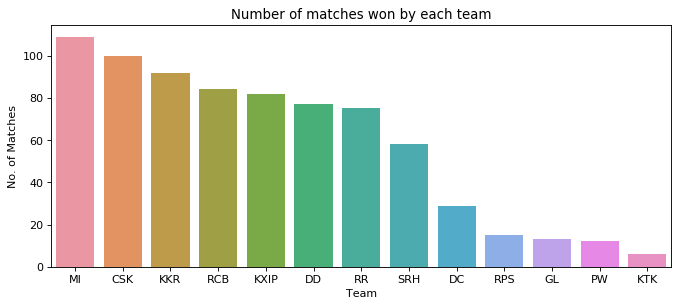

In [7]:
# No. of matches won by each team
fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
d = matches_dataset[matches_dataset.result!='no result']
sns.countplot(x="winner",data=d,order=d.winner.value_counts().index)
plt.title("Number of matches won by each team")
plt.xlabel("Team")
plt.ylabel("No. of Matches")

Mumbai Indians, Chennai Super Kings and Kolkata Knight Riders claim the first three positions when it comes to win the maximum matches but again the bottom few teams in the list have played very less matches.

Text(0, 0.5, 'Count')

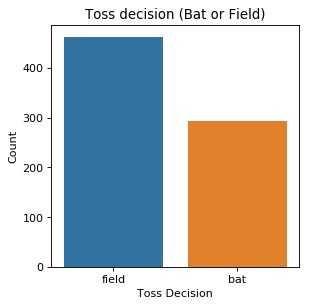

In [8]:
# Toss decisions
fig=plt.figure(figsize=(4, 4), dpi= 80, facecolor='w', edgecolor='k')
sns.countplot(x="toss_decision",data=matches_dataset)
plt.title("Toss decision (Bat or Field)")
plt.xlabel("Toss Decision")
plt.ylabel("Count")

It seems that choosing 'field' after winning the toss has been quite popular choice!

Text(0, 0.5, 'No. of Matches')

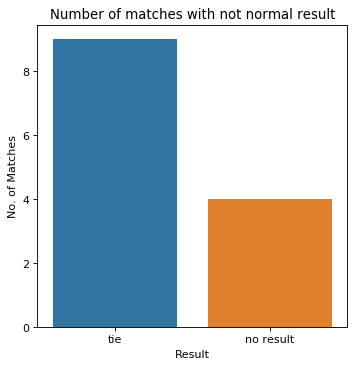

In [9]:
# Match results
fig = plt.figure(figsize = (5,5), dpi=80, facecolor='w',edgecolor='k')
sns.countplot(x="result",data=matches_dataset[matches_dataset.result!='normal'])
plt.title("Number of matches with not normal result")
plt.xlabel("Result")
plt.ylabel("No. of Matches")

It can be concluded that there are very less number of matches having no 'clear winner'. Out of those most of the matches end up being a 'tie' and very small number of them are without any result.

Text(0, 0.5, 'Players')

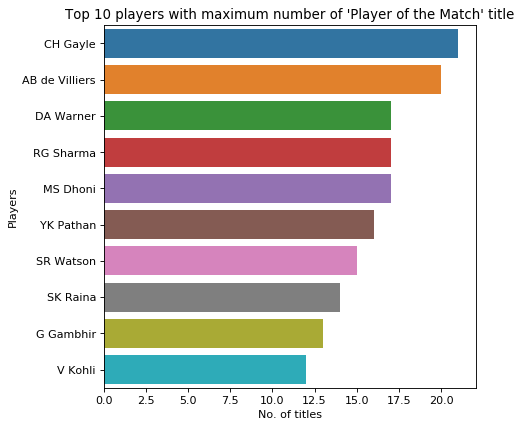

In [10]:
# Maximum player of matches
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
sns.countplot(y="player_of_match",data=matches_dataset,order=matches_dataset.player_of_match.value_counts().head(10).index)
plt.title("Top 10 players with maximum number of 'Player of the Match' title")
plt.xlabel("No. of titles")
plt.ylabel("Players")

Looks like Chris Gayle and AB de Villiers have clearly proved themselves to be heroes for their teams on a great number of occasions! RCB must be really lucky to have both of them!

Text(0, 0.5, 'Venues')

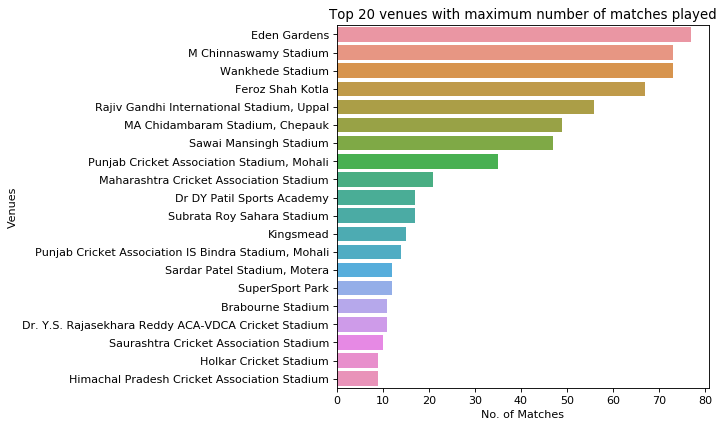

In [11]:
# Number of matches played in different stadiums
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
sns.countplot(y="venue",data=matches_dataset,order=matches_dataset.venue.value_counts().head(20).index)
plt.title("Top 20 venues with maximum number of matches played")
plt.xlabel("No. of Matches")
plt.ylabel("Venues")

Eden Gardens tops the list of favourite stadiums!

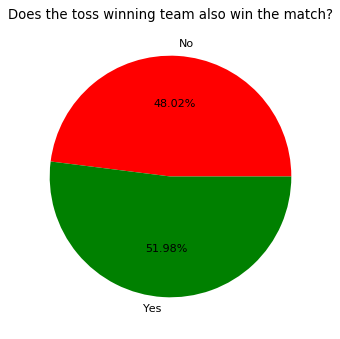

In [12]:
# Impact of winning the toss on match result
fig = plt.figure(figsize = (5,5), dpi=80, facecolor = 'w', edgecolor='k')
sizes = [len(matches_dataset[matches_dataset.toss_winner != matches_dataset.winner]) , len(matches_dataset[matches_dataset.toss_winner == matches_dataset.winner])]
labels = ['No','Yes']
colors = ['r','g']
plt.pie(sizes,labels=labels, colors=colors,autopct="%.2f%%")
plt.title("Does the toss winning team also win the match?")
plt.show()

Looks like winning the toss doesn't favour winning the match too as there is almost a 50-50 distribution.

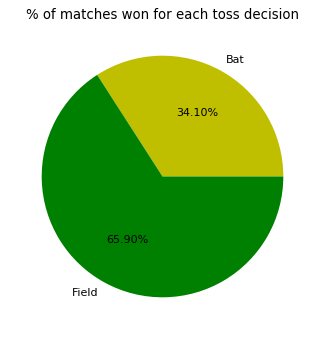

In [13]:
# Impact of toss decision on match result
fig = plt.figure(figsize = (5,5), dpi=80, facecolor = 'w', edgecolor='k')
sizes = [len(matches_dataset[(matches_dataset.toss_winner == matches_dataset.winner) & (matches_dataset.toss_decision=='bat')]) , len(matches_dataset[(matches_dataset.toss_winner == matches_dataset.winner) & (matches_dataset.toss_decision=='field')])]
labels = ['Bat','Field']
colors = ['y','g']
plt.pie(sizes,labels=labels, colors=colors,autopct="%.2f%%")
plt.title("% of matches won for each toss decision")
plt.show()

Perhaps now it makes sense why choosing 'Field' was such a popular choice!

In [14]:
# Winners of different IPL Seasons
seasons_list = sorted(matches_dataset.season.unique())
winners_list=[]
print("Winners in different seasons were following:")
for i in seasons_list:
    print(str(i)+": "+str(matches_dataset[matches_dataset.season==i].iloc[-1].winner))
    winners_list.append(matches_dataset[matches_dataset.season==i].iloc[-1].winner)

Winners in different seasons were following:
2008: RR
2009: DC
2010: CSK
2011: CSK
2012: KKR
2013: MI
2014: KKR
2015: MI
2016: SRH
2017: MI
2018: CSK
2019: MI


Mumbai Indians claimed the trophy for 4 times followed closely by Chennai Super Kings having won it 3 times. It's a bit strange not having the Royal Challengers Bangalore in the list even for once despite of having players like Chris Gayle and AB de Villiers!

In [15]:
# Creating a list containing the name of each team
team_list = list(sorted(deliveries_dataset.batting_team.unique()))

# Creating a list containing each season
season_list = list(sorted(matches.season.unique()))

# Creating a list of player names
players_list = list(sorted(set(list(deliveries_dataset.batsman.unique()) + list(deliveries_dataset.non_striker.unique()) + list(deliveries_dataset.bowler.unique()))))

In [16]:
# Grouping matches played by each team seasonwise
season_min_id=[]
season_max_id=[]
matches_per_season=[]
team_matches_played=[]
for i in sorted(matches.season.unique()):
    df=matches_dataset[matches_dataset.season==i]
    season_min_id.append(matches[matches.season==i].id.min())
    season_max_id.append(matches[matches.season==i].id.max())
    matches_per_season.append(len(matches[matches.season==i]))
for j in team_list:
    team_matches_played.append(len(matches_dataset[(matches_dataset.team1==j)|(matches_dataset.team2==j)]))

In [17]:
season_total_runs=[]    # List for total runs in each season
season_extra_runs = []  # List for extras in each season
season_wickets=[]       # List for total wickets in each season
season_boundaries=[]    # List for total fours in each season
season_sixes=[]         # List for total sixes in each season
for i in range(len(season_min_id)):
    d = deliveries_dataset[(season_min_id[i]<=deliveries_dataset.match_id)&(season_max_id[i]>=deliveries_dataset.match_id)]
    season_total_runs.append(np.sum(d.total_runs))
    season_extra_runs.append(np.sum(d.extra_runs))
    season_wickets.append(np.sum(d.player_dismissed.notnull().sum()))
    season_boundaries.append(len(d[d.batsman_runs==4]))
    season_sixes.append(len(d[d.batsman_runs==6]))

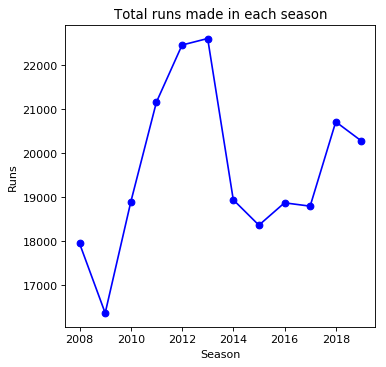

In [18]:
# Total runs made in each season
fig = plt.figure(figsize=(5,5),dpi=80,facecolor='w',edgecolor='k')
plt.plot(season_list,season_total_runs,'b-o')
plt.title("Total runs made in each season")
plt.xlabel("Season")
plt.ylabel("Runs")
plt.show()

The seasons from 2011 to 2013 show huge runs scored which is quite obvious due to more number of matches but season 2009 seems to be completely a bowlers' season.

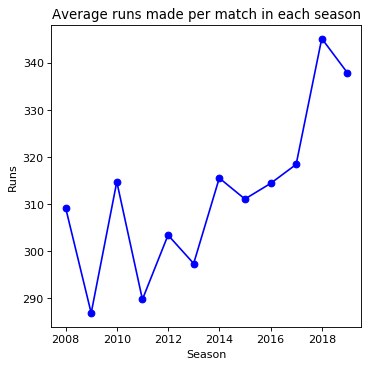

In [19]:
# Average runs made per match in each season
season_average_runs = np.divide(season_total_runs,matches_per_season)
fig = plt.figure(figsize=(5,5),dpi=80,facecolor='w',edgecolor='k')
plt.plot(season_list,season_average_runs,'b-o')
plt.title("Average runs made per match in each season")
plt.xlabel("Season")
plt.ylabel("Runs")
plt.show()

Looks like season 2018 witnessed some sky high team totals!

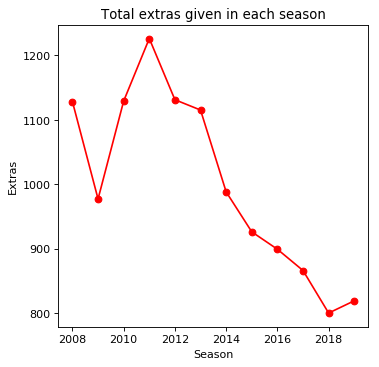

In [20]:
# Total extras given in each season
fig = plt.figure(figsize=(5,5),dpi=80,facecolor='w',edgecolor='k')
plt.plot(season_list,season_extra_runs,'r-o')
plt.title("Total extras given in each season")
plt.xlabel("Season")
plt.ylabel("Extras")
plt.show()

Looks like bowling has become more controlled and disciplined recently.

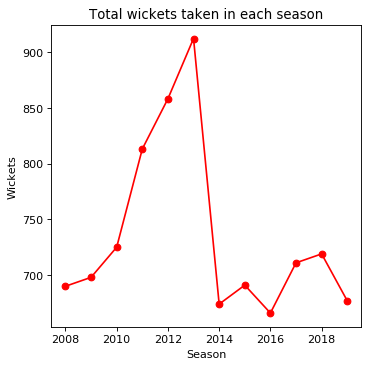

In [21]:
# Total wickets taken in each season
fig = plt.figure(figsize=(5,5),dpi=80,facecolor='w',edgecolor='k')
plt.plot(season_list,season_wickets,'r-o')
plt.title("Total wickets taken in each season")
plt.xlabel("Season")
plt.ylabel("Wickets")
plt.show()

Again, quite obvious patterns accounting for more number of matches in between.

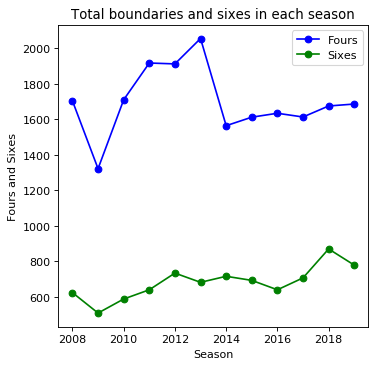

In [22]:
# Total boundaries and sixes in each season
fig = plt.figure(figsize=(5,5),dpi=80,facecolor='w',edgecolor='k')
plt.plot(season_list,season_boundaries,'b-o',label="Fours")
plt.plot(season_list,season_sixes,'g-o',label="Sixes")
plt.title("Total boundaries and sixes in each season")
plt.xlabel("Season")
plt.ylabel("Fours and Sixes")
plt.legend()
plt.show()

A gradual increase can be seen in the number of sixes with peak being in season 2018. No wonder, this season must have been full of high scoring matches.

In [23]:
# Function to get complete batting profile of a player
def batting_profile(player):
    df = deliveries_dataset[deliveries_dataset.batsman==player]
    
    Inn = len(df.match_id.unique())
    NO = Inn-len(df[df.player_dismissed==player])
    Runs = np.sum(df.batsman_runs)
    HS = 0
    Avg = "-"
    if(Inn!=NO):
        Avg = (Runs/(Inn-NO)).round(2)
    BF = len(df)-len(df[df.wide_runs>0])
    SR = '-'
    if(BF!=0):
        SR = ((Runs/BF)*100).round(2)
    hundreds = 0
    fifties = 0
    fours = len(df[df.batsman_runs==4])
    sixes = len(df[df.batsman_runs==6])
    
    for i in df.match_id.unique():
        tmp_df = df[df.match_id==i]
        if(np.sum(tmp_df.batsman_runs)>=50):
            fifties+=1
        if(np.sum(tmp_df.batsman_runs)>=100):
            hundreds+=1
        if(np.sum(tmp_df.batsman_runs)>HS):
            HS = np.sum(tmp_df.batsman_runs)
            
    profile = {"Inn":Inn,"NO":NO,"Runs":Runs,"HS":HS,"Avg":Avg,"BF":BF,"SR":SR,"hundreds":hundreds,"fifties":fifties,"fours":fours,"sixes":sixes}
    return (profile)

In [24]:
# Creating a dataframe containing batting profiles of each player
batting_data = pd.DataFrame(columns=['Player Name','No of Innings Batted','No of Not Outs','No of Runs Scored','Highest Score','Batting Average','No of Balls Faced','Batting Strike Rate','No of 100s Scored','No of 50s Scored','No of fours hit','No of sixes hit'])

for i in range(len(players_list)):
    p = batting_profile(players_list[i])
    lst=[players_list[i],p.get("Inn"),p.get("NO"),p.get("Runs"),p.get("HS"),p.get("Avg"),p.get("BF"),p.get("SR"),p.get("hundreds"),p.get("fifties"),p.get("fours"),p.get("sixes")]
    batting_data.loc[i]=lst
batting_data.head()

,Player Name,No of Innings Batted,No of Not Outs,No of Runs Scored,Highest Score,Batting Average,No of Balls Faced,Batting Strike Rate,No of 100s Scored,No of 50s Scored,No of fours hit,No of sixes hit
0,A Ashish Reddy,23,8,280,36,18.67,193,145.08,0,0,16,15
1,A Chandila,2,2,4,4,-,7,57.14,0,0,0,0
2,A Chopra,6,1,53,24,10.6,71,74.65,0,0,7,0
3,A Choudhary,3,2,25,15,25,20,125,0,0,1,1
4,A Dananjaya,1,1,4,4,-,5,80,0,0,0,0


Text(0.5, 0, 'Players')

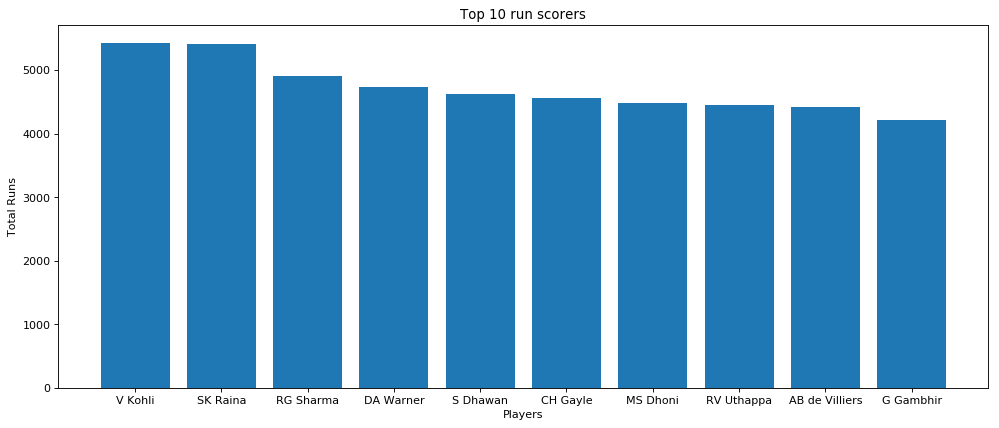

In [25]:
# Top 10 run scorers
fig=plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
df = batting_data.sort_values('No of Runs Scored',ascending=False).head(10)
plt.bar(x=df['Player Name'],height=df['No of Runs Scored'])
plt.title("Top 10 run scorers")
plt.ylabel("Total Runs")
plt.xlabel("Players")

Three players in the top 10 list are from Royal Challengers Bangalore alone with Virat Kohli being at top and two players are each from Chennai Super Kings and Sunrisers Hyderabad.

Text(0.5, 0, 'Players')

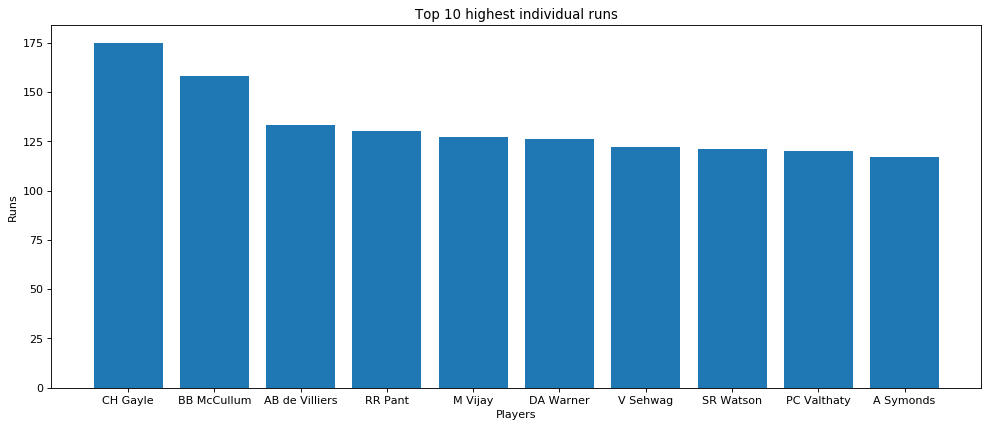

In [26]:
# Top 10 highest individual runs
fig=plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
df = batting_data.sort_values('Highest Score',ascending=False).head(10)
plt.bar(x=df['Player Name'],height=df['Highest Score'])
plt.title("Top 10 highest individual runs")
plt.ylabel("Runs")
plt.xlabel("Players")

Chris Gayle seems to be the most destructive batsman with the highest individual score's record in his hand.

Text(0.5, 0, 'Players')

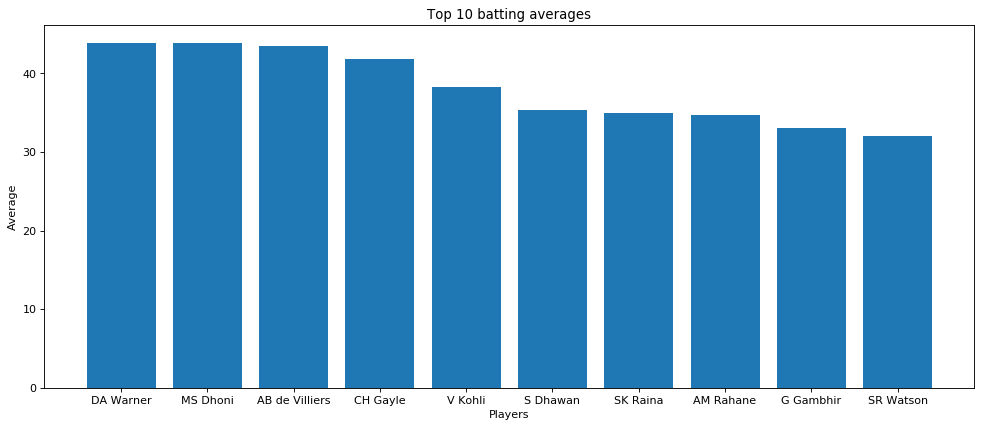

In [27]:
# Top 10 batting averages
fig=plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
df = batting_data[(batting_data['Batting Average']!='-')&(batting_data['No of Innings Batted']>80)].sort_values('Batting Average',ascending=False).head(10)
plt.bar(x=df['Player Name'],height=df['Batting Average'])
plt.title("Top 10 batting averages")
plt.ylabel("Average")
plt.xlabel("Players")

Almost the same few names seems to be reordering themselves in the batting averages list. This time MS Dhoni appears to be in neck to neck competition with David Warner.
Note- I have considered only those players for this list who have played more than 80 innings.

Text(0.5, 0, 'Players')

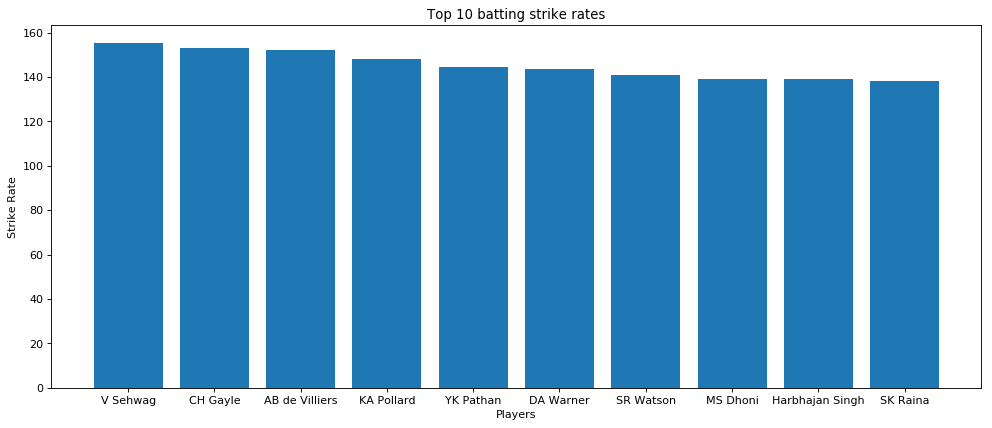

In [28]:
# Top 10 batting strike rates
fig=plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
df = batting_data[(batting_data['Batting Strike Rate']!='-')&(batting_data['No of Innings Batted']>80)].sort_values('Batting Strike Rate',ascending=False).head(10)
plt.bar(x=df['Player Name'],height=df['Batting Strike Rate'])
plt.title("Top 10 batting strike rates")
plt.ylabel("Strike Rate")
plt.xlabel("Players")

Virendra Sehwag tops the list of hard hitters followed closely by Chris Gayle and AB de Villiers.
Note- I have considered only those players for this list who have played more than 80 innings.

Text(0.5, 0, 'Players')

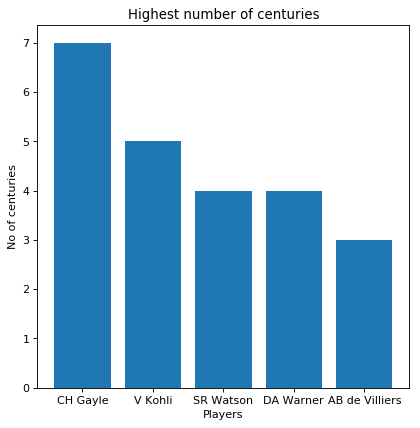

In [29]:
# Highest number of centuries
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
df = batting_data.sort_values('No of 100s Scored',ascending=False).head()
plt.bar(x=df['Player Name'],height=df['No of 100s Scored'])
plt.title("Highest number of centuries")
plt.ylabel("No of centuries")
plt.xlabel("Players")

Once again, Chris Gayle clearly takes the lead when it comes to scoring big numbers. Furthermore, Virat Kohli and AB de Villiers are also included in the top 5 list. Shane Watson and David Warner also make it to this list.

Text(0.5, 0, 'Players')

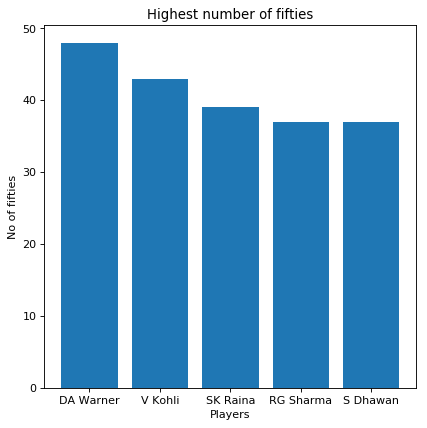

In [30]:
# Highest number of fifties
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
df = batting_data.sort_values('No of 50s Scored',ascending=False).head()
plt.bar(x=df['Player Name'],height=df['No of 50s Scored'])
plt.title("Highest number of fifties")
plt.ylabel("No of fifties")
plt.xlabel("Players")

David Warner and Virat Kohli made it to almost all the batting top lists. It wouldn't be wrong to compliment these two batsmen as the most consistent ones.

Text(0.5, 0, 'Players')

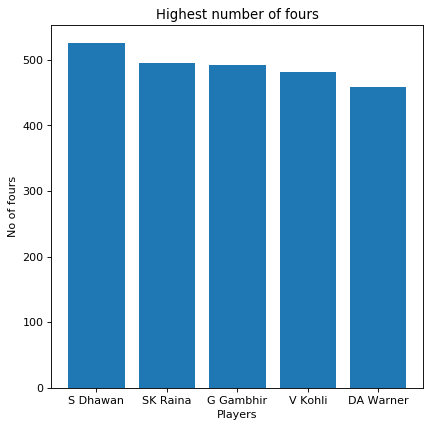

In [31]:
# Highest number of fours
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
df = batting_data.sort_values('No of fours hit',ascending=False).head()
plt.bar(x=df['Player Name'],height=df['No of fours hit'])
plt.title("Highest number of fours")
plt.ylabel("No of fours")
plt.xlabel("Players")

Shikhar Dhawan tops the list of most number of boundaries with Suresh Raina, Gautam Gambhir, Virat Kohli and David Warner on the list.

Text(0.5, 0, 'Players')

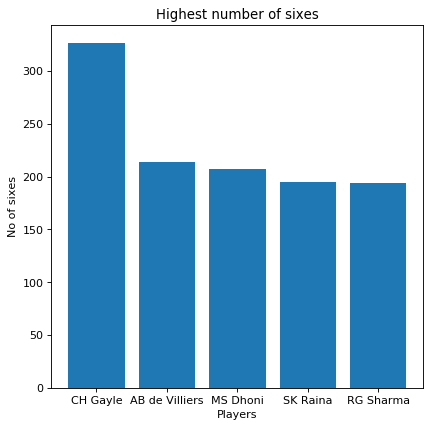

In [32]:
# Highest number of sixes
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
df = batting_data.sort_values('No of sixes hit',ascending=False).head()
plt.bar(x=df['Player Name'],height=df['No of sixes hit'])
plt.title("Highest number of sixes")
plt.ylabel("No of sixes")
plt.xlabel("Players")

Chris Gayle and AB de Villiers were quite expected here seeing their previous trends. MS Dhoni can also be counted as a big name when it comes to taking the run rate high. But Chris Gayle seems to be 'no match' here with a record of 300+ sixes!

In [33]:
# Function to get complete bowling profile of a player
def bowling_profile(player):
    df = deliveries_dataset[deliveries_dataset.bowler==player]
    
    Inn = len(df.match_id.unique())
    Wkts = len(df[(df.player_dismissed.notnull())&(df.dismissal_kind!='run out')&(df.dismissal_kind!='retired hurt')&(df.dismissal_kind!='obstructing the field')])
    B = len(df[(df.wide_runs==0)&(df.noball_runs==0)])
    Runs = np.sum(df.total_runs-(df.bye_runs+df.legbye_runs))
    Econ = '-'
    if(B!=0):
        Econ = ((Runs/B)*6).round(2)
    Avg = '-'
    SR = '-'
    if(Wkts!=0):
        Avg = (Runs/Wkts).round(2)
        SR = (B/Wkts)
    
    profile = {"Inn":Inn,"B":B,"Runs":Runs,"Wkts":Wkts,"Econ":Econ,"Avg":Avg,"SR":SR}
    return(profile)

In [34]:
# Creating a dataframe containing bowling profiles of each player
bowling_data = pd.DataFrame(columns=['Player Name','No of Innings Bowled','No of Balls Bowled','No of Runs Conceded','Wickets','Economy','Bowling Average','Bowling Strike Rate'])

for i in range(len(players_list)):
    p = bowling_profile(players_list[i])
    lst=[players_list[i],p.get("Inn"),p.get("B"),p.get("Runs"),p.get("Wkts"),p.get("Econ"),p.get("Avg"),p.get("SR")]
    bowling_data.loc[i]=lst
bowling_data.head()

,Player Name,No of Innings Bowled,No of Balls Bowled,No of Runs Conceded,Wickets,Economy,Bowling Average,Bowling Strike Rate
0,A Ashish Reddy,20,262,396,18,9.07,22,14.5556
1,A Chandila,12,234,242,11,6.21,22,21.2727
2,A Chopra,0,0,0,0,-,-,-
3,A Choudhary,5,101,144,5,8.55,28.8,20.2
4,A Dananjaya,1,24,48,0,12,-,-


Text(0.5, 0, 'Players')

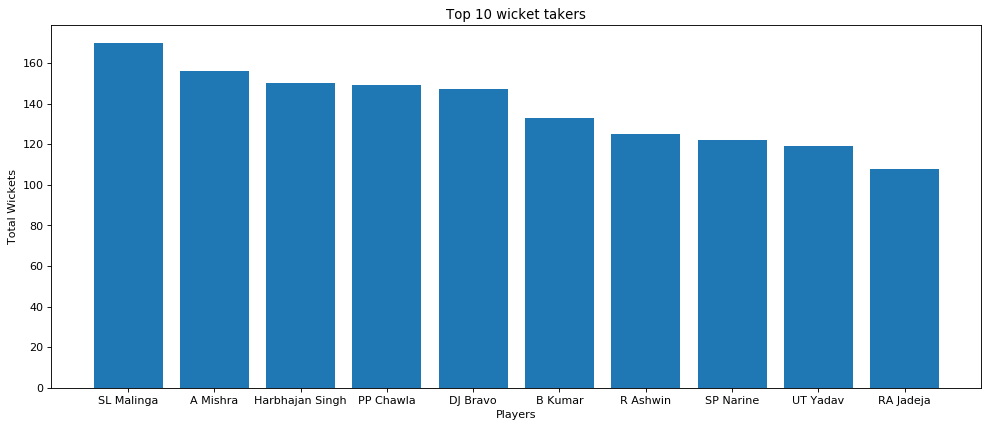

In [35]:
# Top 10 wicket takers
fig=plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
df = bowling_data.sort_values('Wickets',ascending=False).head(10)
plt.bar(x=df['Player Name'],height=df['Wickets'])
plt.title("Top 10 wicket takers")
plt.ylabel("Total Wickets")
plt.xlabel("Players")

Text(0.5, 0, 'Players')

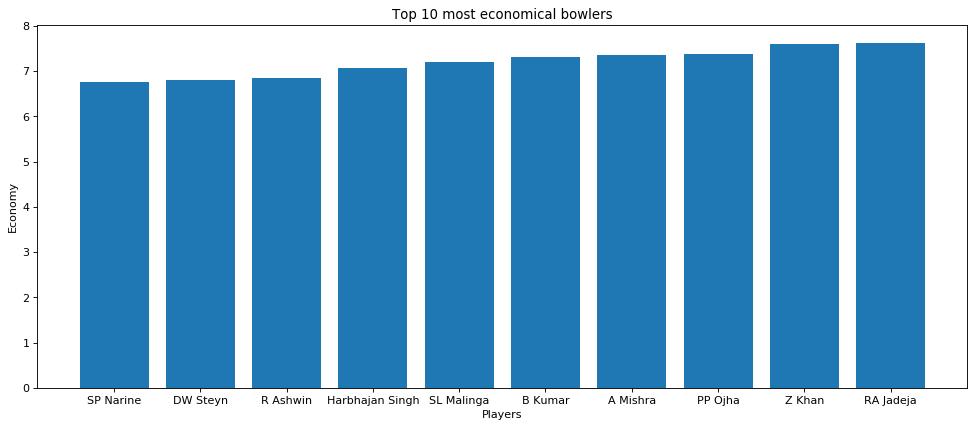

In [36]:
# Top 10 most economical bowlers
fig=plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
df = bowling_data[bowling_data['No of Balls Bowled']>1800].sort_values('Economy',ascending=True).head(10)
plt.bar(x=df['Player Name'],height=df['Economy'])
plt.title("Top 10 most economical bowlers")
plt.ylabel("Economy")
plt.xlabel("Players")

Text(0.5, 0, 'Players')

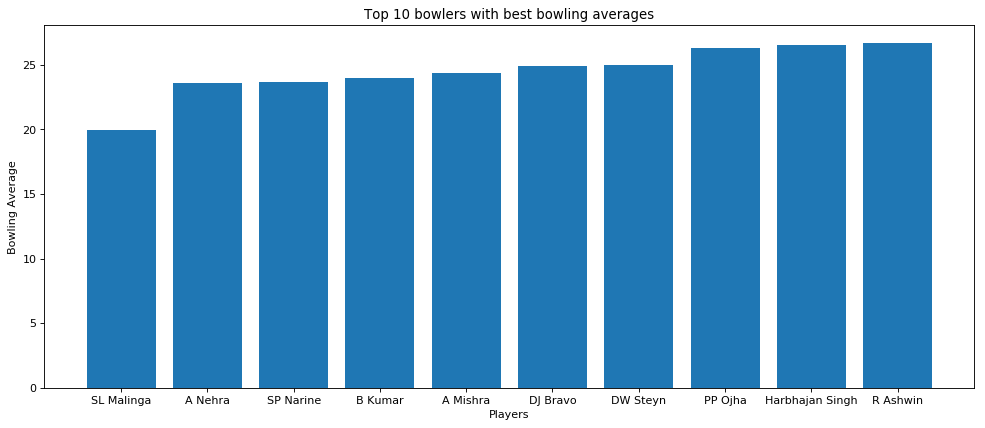

In [37]:
# Top 10 bowlers with best bowling averages
fig=plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
df = bowling_data[bowling_data['No of Balls Bowled']>1800].sort_values('Bowling Average',ascending=True).head(10)
plt.bar(x=df['Player Name'],height=df['Bowling Average'])
plt.title("Top 10 bowlers with best bowling averages")
plt.ylabel("Bowling Average")
plt.xlabel("Players")

Text(0.5, 0, 'Players')

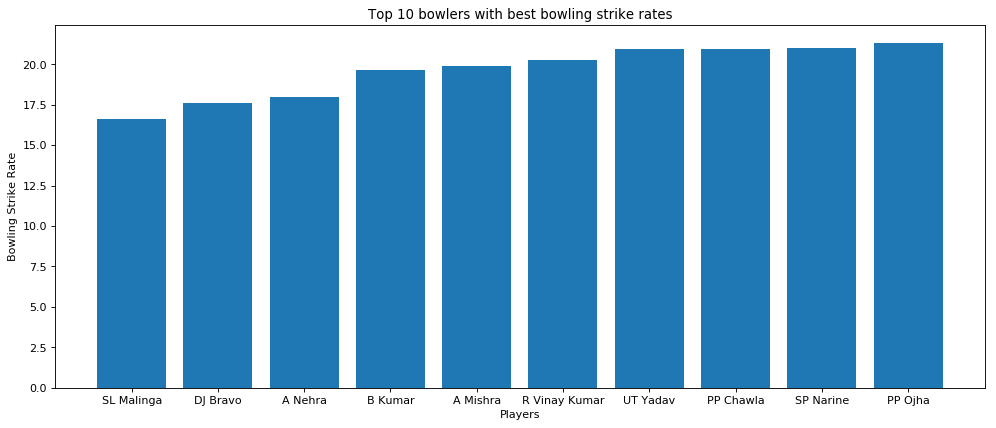

In [38]:
# Top 10 bowlers with best bowling strike rates
fig=plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
df = bowling_data[bowling_data['No of Balls Bowled']>1800].sort_values('Bowling Strike Rate',ascending=True).head(10)
plt.bar(x=df['Player Name'],height=df['Bowling Strike Rate'])
plt.title("Top 10 bowlers with best bowling strike rates")
plt.ylabel("Bowling Strike Rate")
plt.xlabel("Players")

In [39]:
# Teamwise analysis
team_total_runs = []
team_boundaries = []
team_sixes = []
team_wickets = []
team_extra_runs = []
for j in team_list:
    d_bat = deliveries_dataset[deliveries_dataset.batting_team==j]
    d_bowl = deliveries_dataset[deliveries_dataset.batting_team==j]
    team_total_runs.append(np.sum(d_bat.total_runs))
    team_boundaries.append(len(d_bat[d_bat.batsman_runs==4]))
    team_sixes.append(len(d_bat[d_bat.batsman_runs==6]))
    team_wickets.append(np.sum(d_bowl.player_dismissed.notnull().sum()))
    team_extra_runs.append(np.sum(d_bowl.extra_runs))

In [40]:
points_recent = {'CSK':0, 'DC':0, 'DD':0, 'GL':0, 'KKR':0, 'KTK':0, 'KXIP':0, 'MI':0, 'PW':0, 'RCB':0, 'RPS':0, 'RR':0, 'SRH':0}
season_points = {'CSK':0, 'DC':0, 'DD':0, 'GL':0, 'KKR':0, 'KTK':0, 'KXIP':0, 'MI':0, 'PW':0, 'RCB':0, 'RPS':0, 'RR':0, 'SRH':0}
total_points = {'CSK':0, 'DC':0, 'DD':0, 'GL':0, 'KKR':0, 'KTK':0, 'KXIP':0, 'MI':0, 'PW':0, 'RCB':0, 'RPS':0, 'RR':0, 'SRH':0}

matches_recent = {'CSK':0, 'DC':0, 'DD':0, 'GL':0, 'KKR':0, 'KTK':0, 'KXIP':0, 'MI':0, 'PW':0, 'RCB':0, 'RPS':0, 'RR':0, 'SRH':0}
season_match = {'CSK':0, 'DC':0, 'DD':0, 'GL':0, 'KKR':0, 'KTK':0, 'KXIP':0, 'MI':0, 'PW':0, 'RCB':0, 'RPS':0, 'RR':0, 'SRH':0}
total_match = {'CSK':0, 'DC':0, 'DD':0, 'GL':0, 'KKR':0, 'KTK':0, 'KXIP':0, 'MI':0, 'PW':0, 'RCB':0, 'RPS':0, 'RR':0, 'SRH':0}

ratings = {'CSK':100, 'DC':100, 'DD':100, 'GL':100, 'KKR':100, 'KTK':100, 'KXIP':100, 'MI':100, 'PW':100, 'RCB':100, 'RPS':100, 'RR':100, 'SRH':100}
NRR = {'CSK':0, 'DC':0, 'DD':0, 'GL':0, 'KKR':0, 'KTK':0, 'KXIP':0, 'MI':0, 'PW':0, 'RCB':0, 'RPS':0, 'RR':0, 'SRH':0}

In [41]:
seasonwise_ratings = []

In [42]:
for i in season_list:
    df = matches_dataset[matches_dataset.season==i]
    points_past = points_recent.copy()
    points_recent = season_points.copy()
    season_points = {'CSK':0, 'DC':0, 'DD':0, 'GL':0, 'KKR':0, 'KTK':0, 'KXIP':0, 'MI':0, 'PW':0, 'RCB':0, 'RPS':0, 'RR':0, 'SRH':0}
    
    matches_past = matches_recent.copy()
    matches_recent = season_match.copy()
    season_match = {'CSK':0, 'DC':0, 'DD':0, 'GL':0, 'KKR':0, 'KTK':0, 'KXIP':0, 'MI':0, 'PW':0, 'RCB':0, 'RPS':0, 'RR':0, 'SRH':0}
    
    # Calculation of points earned in one match
    for j in range(len(df)):
        team1 = df.iloc[j].team1
        team2 = df.iloc[j].team2
        current_points = {'CSK':0, 'DC':0, 'DD':0, 'GL':0, 'KKR':0, 'KTK':0, 'KXIP':0, 'MI':0, 'PW':0, 'RCB':0, 'RPS':0, 'RR':0, 'SRH':0}
        season_match[team1] +=1
        season_match[team2] +=1
        total_match[team1] +=1
        total_match[team2] +=1
        s1 = ratings.get(team1)
        s2 = ratings.get(team2)
        wn = df.iloc[j].winner
        if(abs(s1-s2)<40):
            if(wn==team1):
                current_points[team1] += s2+50
                current_points[team2] += s1-50
            elif(wn==team2):
                current_points[team1] += s2-50
                current_points[team2] += s1+50
            else:
                current_points[team1] += s2
                current_points[team2] += s1
        if(abs(s1-s2)>=40):
            if(s1>s2):
                if(wn==team1):
                    current_points[team1] += s1+10
                    current_points[team2] += s2-10
                elif(wn==team2):
                    current_points[team1] += s1-90
                    current_points[team2] += s2+90
                else:
                    current_points[team1] += s1-40
                    current_points[team2] += s2+40
            elif(s2>s1):
                if(wn==team1):
                    current_points[team1] += s1+90
                    current_points[team2] += s2-90
                elif(wn==team2):
                    current_points[team1] += s1-10
                    current_points[team2] += s2+10
                else:
                    current_points[team1] += s1+40
                    current_points[team2] += s2-40
        
        season_points[team1]+=current_points[team1]
        season_points[team2]+=current_points[team2]
        total_points[team2]+=current_points[team2]
        total_points[team2]+=current_points[team2]
        
        ratings[team1] = round((current_points[team1]+points_recent[team1]+points_past[team1]*0.5)/(1+matches_recent[team1]+matches_past[team1]*0.5))
        ratings[team2] = round((current_points[team2]+points_recent[team2]+points_past[team2]*0.5)/(1+matches_recent[team2]+matches_past[team2]*0.5))

In [43]:
total_match

{'CSK': 164,
 'DC': 75,
 'DD': 177,
 'GL': 30,
 'KKR': 178,
 'KTK': 14,
 'KXIP': 176,
 'MI': 187,
 'PW': 46,
 'RCB': 180,
 'RPS': 30,
 'RR': 147,
 'SRH': 108}

In [44]:
total_points

{'CSK': 17994,
 'DC': 3016,
 'DD': 19830,
 'GL': 4190,
 'KKR': 20680,
 'KTK': 1158,
 'KXIP': 17340,
 'MI': 19250,
 'PW': 3566,
 'RCB': 18222,
 'RPS': 3238,
 'RR': 17848,
 'SRH': 10004}

In [45]:
ratings

{'CSK': 120,
 'DC': 88,
 'DD': 81,
 'GL': 116,
 'KKR': 111,
 'KTK': 67,
 'KXIP': 94,
 'MI': 107,
 'PW': 73,
 'RCB': 89,
 'RPS': 78,
 'RR': 94,
 'SRH': 106}